[View in Colaboratory](https://colab.research.google.com/github/ajayatluri79/deeplearning/blob/master/Sci_py_Basics_final.ipynb)

In [0]:
import numpy as np
from scipy import stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

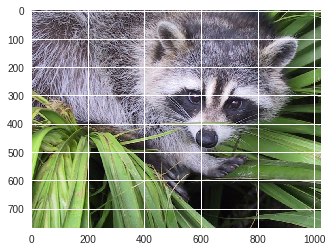

In [2]:
from scipy import misc

# face image comes by default in scipy
f = misc.face()

plt.imshow(f)
plt.show()

In [3]:
# notice how rows run top to bottom, and cols run left to right
print("Face dimensions:", f.shape)

# save for future use
orig_shape = f.shape

Face dimensions: (768, 1024, 3)


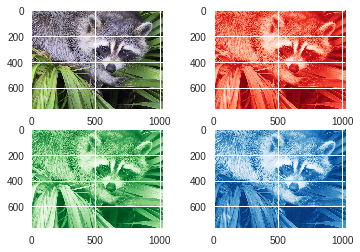

In [4]:
# start with the full image
color_comps = [f]
color_maps = [None]

# separate the color components
color_comps.extend(np.split(f, 3, axis=2)) # same as np.dsplit(f, 3)
color_maps.extend((plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r))

for i, (comp, cm) in enumerate(zip(color_comps, color_maps), 1):
    plt.subplot(220 + i)
    plt.imshow(comp.squeeze(), cmap=cm) # squeeze to remove the last dimension, which is just 1
plt.show()

In [0]:
def visualize(parts):
    dim = int(np.sqrt(len(parts)))
    for i, part in enumerate(parts, 1):
        plt.subplot(dim, dim, i)
        plt.imshow(part.squeeze())
    plt.show()

No. of parts: 16
Shape of each part: (192, 256, 1, 3)


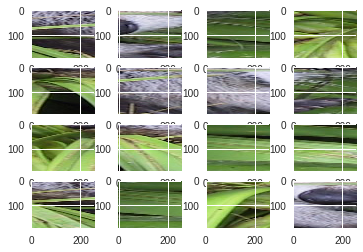

In [6]:
# split the image into 16 equal parts
nr, nc = f.shape[0]//4, f.shape[1]//4
f16 = f.reshape(nr, nc, -1, 3, order='F')
f16 = np.split(f16, f16.shape[2], axis=2)
print("No. of parts:", len(f16))
print("Shape of each part:", f16[0].shape)

# randomize & visualize
np.random.shuffle(f16)
visualize(f16)

In [7]:
 #pixels are stored in the rightmost dimension first
fb = f.tobytes()
print(fb[0], fb[1], fb[2], fb[3])
print(f[0][0][0], f[0][0][1], f[0][0][2], f[0][1][0])

121 112 131 138
121 112 131 138


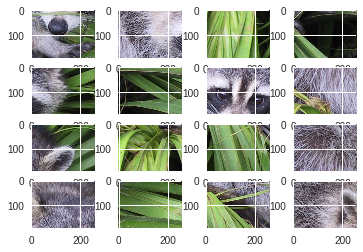

In [8]:
import itertools

f16 = []
for i, j in itertools.product(range(4), range(4)):
    f16.append( f[i*nr:(i+1)*nr, j*nc:(j+1)*nc, :] )

# randomize & visualize
np.random.shuffle(f16)
visualize(f16)

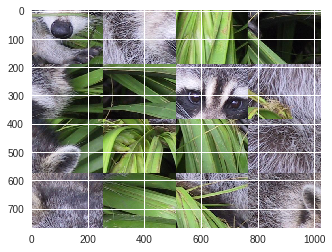

In [9]:
# join the parts into a single image
# one possible solution: there may be better ways!
rows = [ np.concatenate([c for c in f16[r*4:(r+1)*4]], axis=1) for r in range(4)]
f_from_f16 = np.concatenate(rows, axis=0)
plt.imshow(f_from_f16)

Shape of quarter_center: (384, 512, 3)


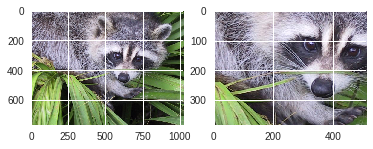

In [10]:
# get quarter of the image at the center
quarter_center = f[nr:3*nr, nc:3*nc, : ]
plt.imshow(quarter_center)
print("Shape of quarter_center:", quarter_center.shape)

plt.subplot(121)
plt.imshow(f)
plt.subplot(122)
plt.imshow(quarter_center)
plt.show()

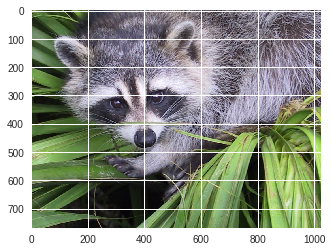

In [11]:
f_mirror = np.flip(f, axis=1)
plt.imshow(f_mirror)
plt.show()

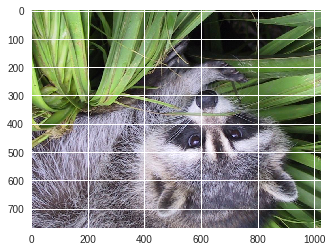

In [12]:
f_mirror = np.flip(f, axis=0)
plt.imshow(f_mirror)
plt.show()

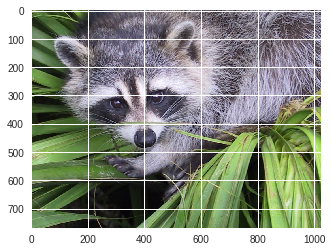

In [13]:
f_mirror = np.flip(f, axis=1)
plt.imshow(f_mirror)
plt.show()

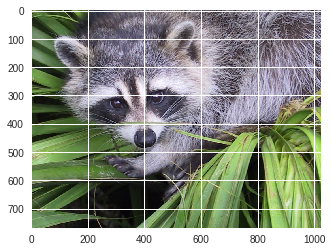

In [14]:
f_mirror = np.flip(f, axis=1)
plt.imshow(f_mirror)
plt.show()

# Can you guess what will happen if you flip with axis=2?

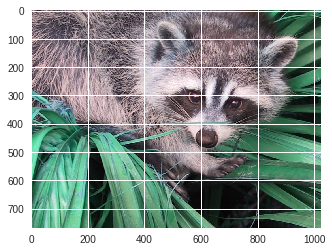

In [15]:
f_mirror = np.flip(f, axis=2)
plt.imshow(f_mirror)
plt.show()

# Can you guess what will happen if you flip with axis=2?

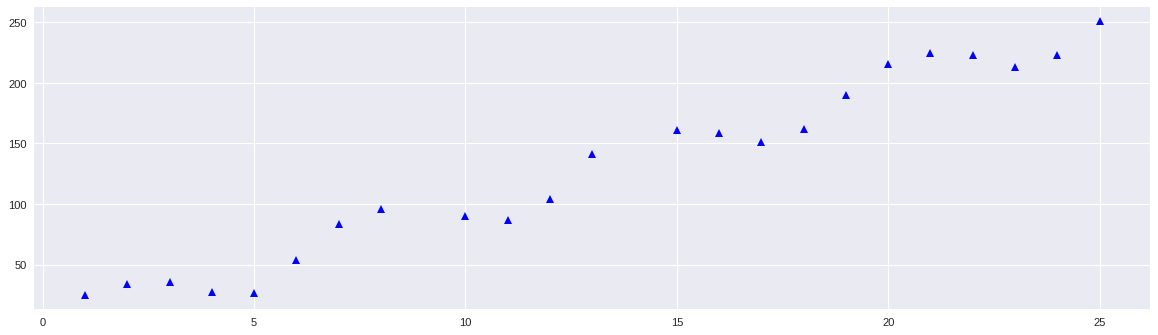

In [16]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')


# Data 

num_points = 25
x = np.linspace(1, num_points, num_points)
Y = 10*x  + 10*(0.5-np.random.rand(num_points)) +  20*np.sin(x)

origx=x
origY=Y

x=np.delete(x,8)
Y=np.delete(Y,8)
x=np.delete(x,12)
Y=np.delete(Y,12)


time = np.linspace(x.min(), x.max(), num_points)
plt.plot(x, Y, "b^")

array([9.73054346, 1.69009378, 1.        ])

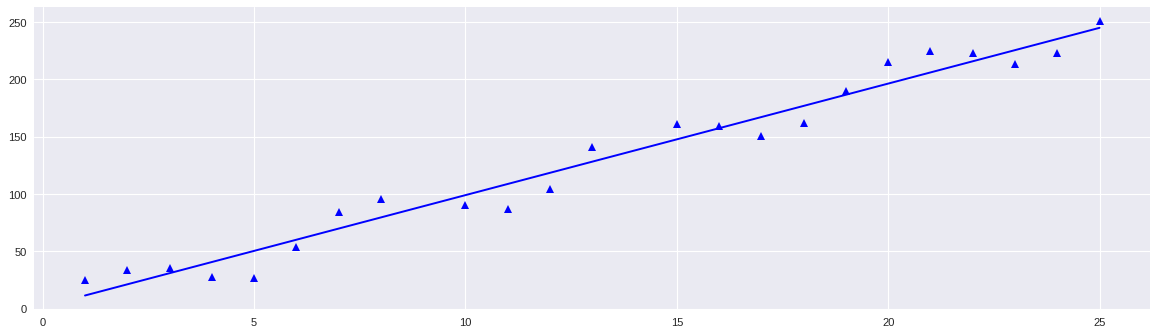

In [17]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

# optimization
from scipy import optimize

# Fit the first set
time = np.linspace(x.min(), x.max(), num_points)

fitfunc1 = lambda p, x: p[0]*x + p[1] #+  p[2] *np.sin(x) # Target function
errfunc = lambda p, x, y: fitfunc1(p, x) - y # Distance to the target function
parameter_1 = [1., 1., 1.]
p2,success = optimize.leastsq(errfunc, parameter_1[:], args=(x, Y))
plt.plot(x, Y, "b^", time, fitfunc1(p2, time), "b-")
p2

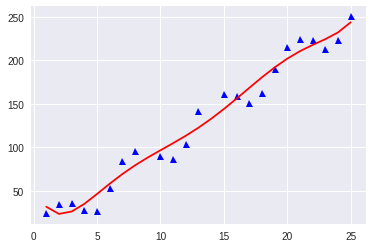

In [18]:
# Check how well a polynomial fits with this data
fitfunc2 = lambda p, x: p[0]*x**6 + p[1]*x**5 + p[2]*x**4 + p[3]*x**3 + p[4]*x**2 + p[5]*x + p[6] # Target function
errfunc = lambda p, x, y: fitfunc2(p, x) - y # Distance to the target function
parameter_2 = [1., 1., 1.,1., 1., 1., 1.]
p2,success = optimize.leastsq(errfunc, parameter_2[:], args=(x, Y))
plt.plot(x, Y, "b^", time, fitfunc2(p2, time), "r-")

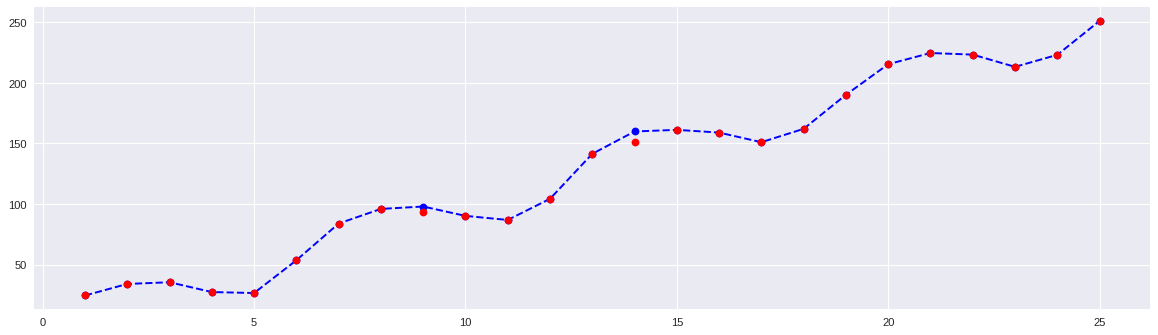

In [19]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

# interpolation
from scipy.interpolate import interp1d
xnew = np.linspace(x.min(), x.max(), num_points)
f = interp1d(x, Y)
# f = interp1d(x, Y, kind='nearest')
# f = interp1d(x, Y, kind='previous')
# f = interp1d(x, Y, kind='next')
plt.plot(origx,origY,'bo',origx,origY,'b--', xnew, f(xnew), 'ro')

In [20]:
import os.path

fname = 'FremontBridge.csv'
if not os.path.isfile(fname):
    !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1474k    0 1474k    0     0   380k      0 --:--:--  0:00:03 --:--:--  380k


In [0]:
data = pd.read_csv(fname, index_col='Date', parse_dates=True)

In [22]:
# data.dtypes
# data.describe()
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [0]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

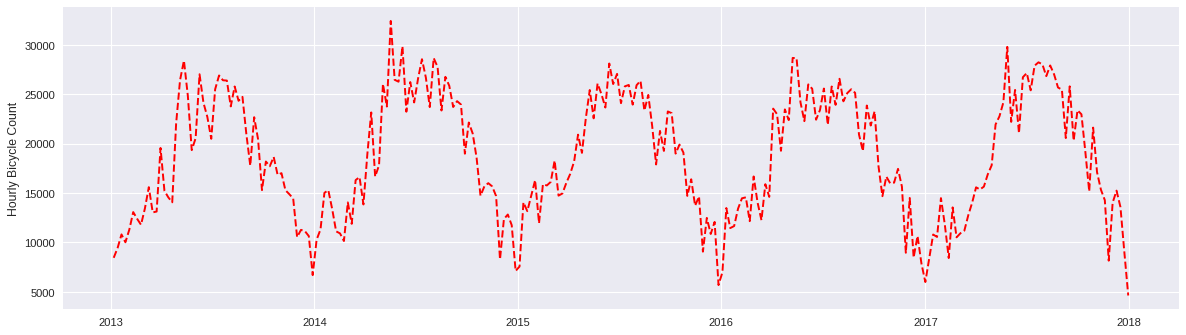

In [24]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
# data[['Total']].plot()
plt.ylabel('Hourly Bicycle Count');
n_rows=50000
# plt.plot(data.index[:n_rows],data[['Total']][:n_rows],"r--")
signal=data[['Total']].resample('W').sum()
signal=signal[(signal.index.year>=2013) & (signal.index.year<=2017)]
plt.plot(signal.index,signal,"r--")

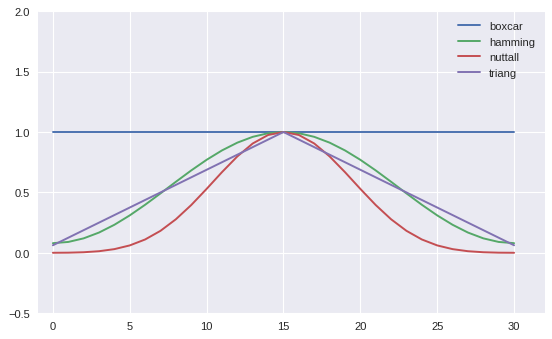

In [25]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

from scipy.signal import boxcar, hamming, nuttall, triang
windows=['boxcar', 'hamming', 'nuttall', 'triang']
plt.subplot(121)
for w in windows:
     eval( 'plt.plot(' + w + '(31))' )
     plt.ylim([-0.5,2]); plt.xlim([-1,32])
     plt.legend(windows)

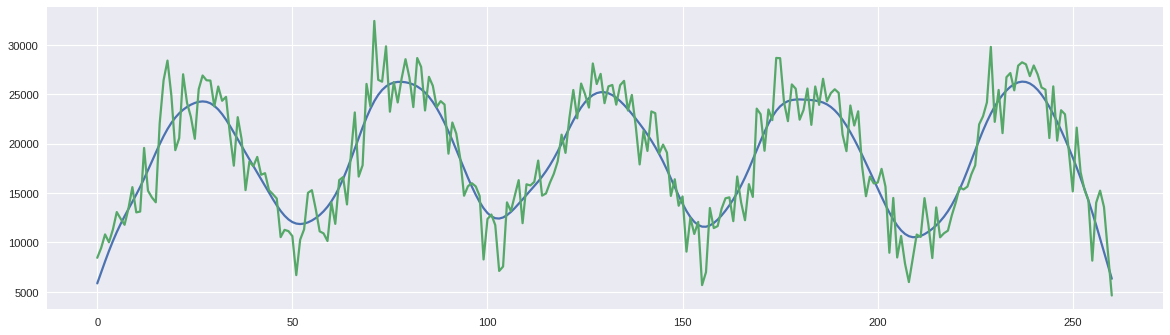

In [26]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

# window= eval( 'boxcar'+'(31)')
window= eval( 'nuttall'+'(31)')
# print(len(window))
output=np.convolve(window/window.sum(),signal.values[:,0])
from scipy.ndimage.interpolation import shift
output=shift(output,-15)
output=output[:-30]
plt.plot(output,linewidth=2)
plt.plot(signal.values[:,0],linewidth=2)

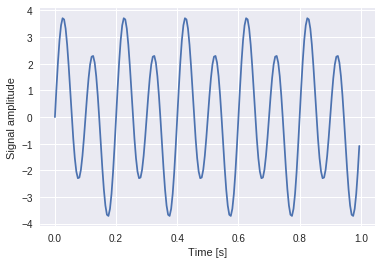

In [27]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

f1 = 10  # Frequency, in cycles per second, or Hertz
f2= 5
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 1, 2 * f_s, endpoint=False)
x = 3 * np.sin( f1 * 2 * np.pi * t) + np.sin(f2 * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(0, 500)

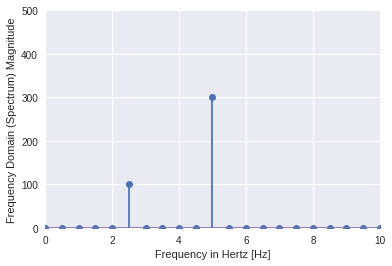

In [28]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

from scipy.fftpack import fft, ifft, fftfreq

X = fft(x)
freqs = fftfreq(len(X)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 10)
ax.set_ylim(0, 500)

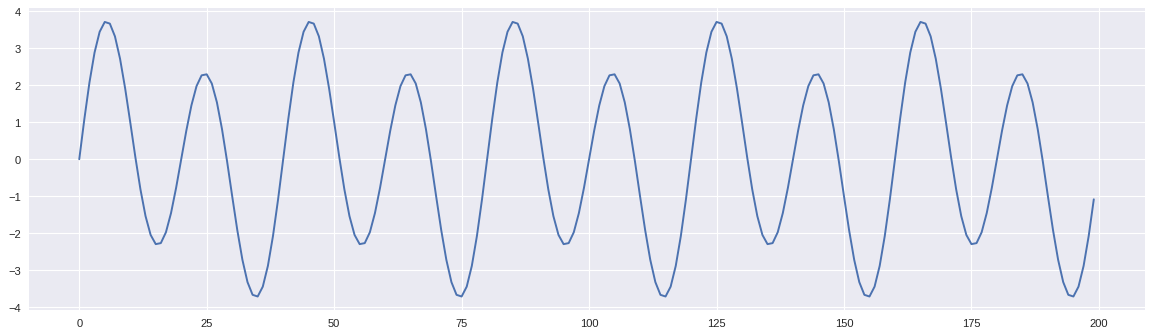

In [29]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
Xinv = ifft(X)
plt.plot(np.real(Xinv))


(0, 200)

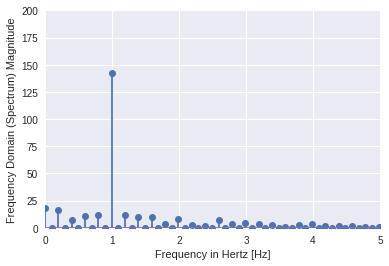

In [30]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')

from scipy.fftpack import fft,ifft
no=2*((output-min(output))/max(output))-1  # standardize data between -1 and 1
new_output=np.concatenate((no,no))

yf = fft(new_output)

freqs = fftfreq(len(yf)) * 52

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(yf))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 5)
ax.set_ylim(0, 200)

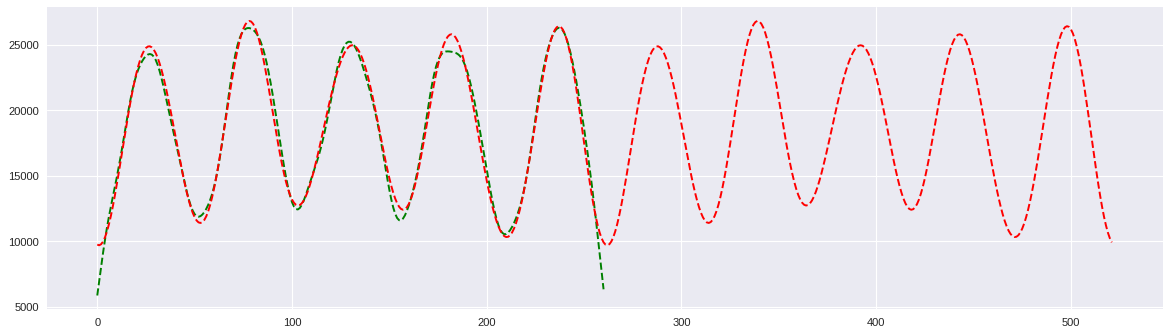

In [31]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
F=[ yf[x1]  if np.abs(yf)[x1]>=10 else 0 for x1 in np.arange(len(yf))]
Xinv = np.real(ifft(F))

transformed_output=((Xinv+1)/2)*max(output)+min(output)
plt.plot(output,'g--',transformed_output,'r--')

6. Exploratory analysis for time series data

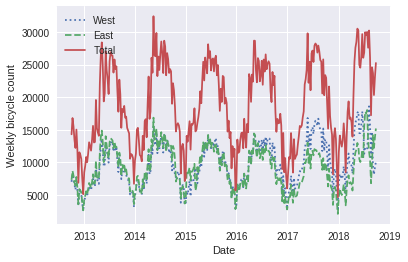

In [32]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

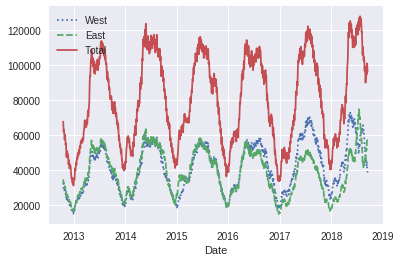

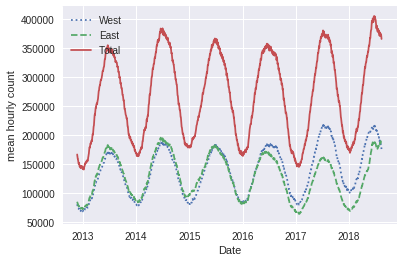

In [33]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
daily.rolling(100, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

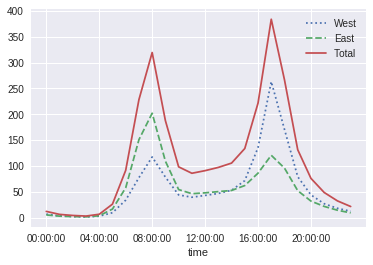

In [34]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [0]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


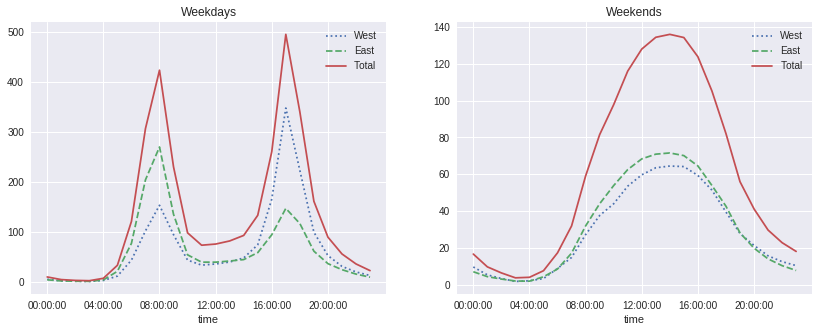

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',xticks=hourly_ticks, style=[':', '--', '-']);